In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

from cmbml.utils.handle_data import get_planck_noise_data, get_planck_obs_data

In [2]:
DATA_ROOT = "/data/jim/CMB_Data/"
ASSETS_DIRECTORY = f"{DATA_ROOT}/Assets/Planck/"
PLANCK_NOISE_DIR = f"{DATA_ROOT}/Assets/PlanckNoise/"

DET = 545

In [3]:
scale = 1 if DET in [545, 857] else 1e6  # Convert to uK unless units are MJy/sr
planck_nse_sim_fn = get_planck_noise_data(DET, PLANCK_NOISE_DIR)
planck_nse_sim = hp.read_map(planck_nse_sim_fn) * scale
# hp.mollview(planck_nse_sim, title=f"Planck {det} GHz Noise")

fn = f"noise_avgs/avg_noise_map_{DET}_TQU_100.fits"
planck_nse_avg = hp.read_map(fn) * scale
planck_nse_avg_sm = hp.smoothing(planck_nse_avg, fwhm=np.radians(10/60))

obs_fn = get_planck_obs_data(DET, ASSETS_DIRECTORY)
obs = np.abs(hp.read_map(obs_fn)) * scale

sig_map = np.abs(planck_nse_avg_sm) / np.abs(obs)

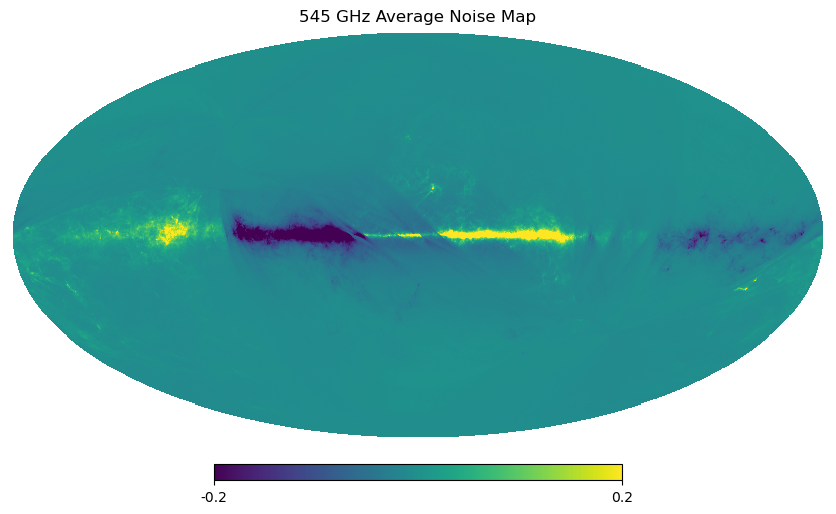

In [4]:
hp.mollview(planck_nse_avg_sm, title=f"{DET} GHz Average Noise Map", min=-0.2, max=0.2)

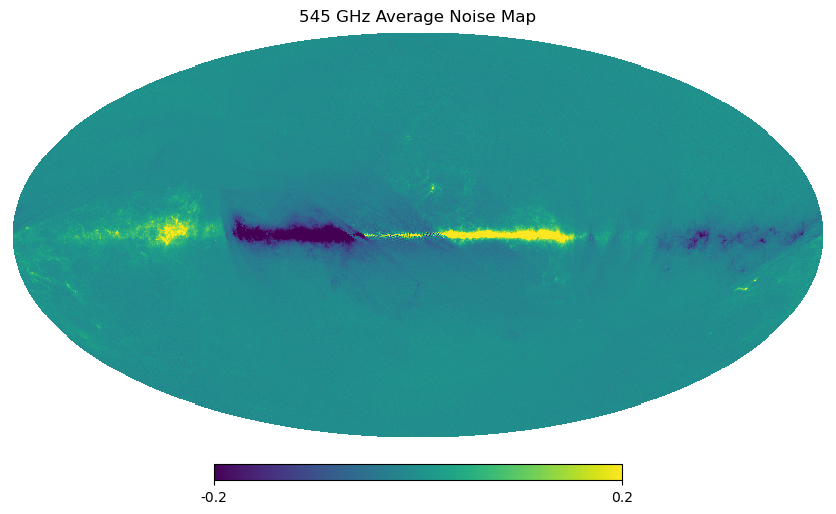

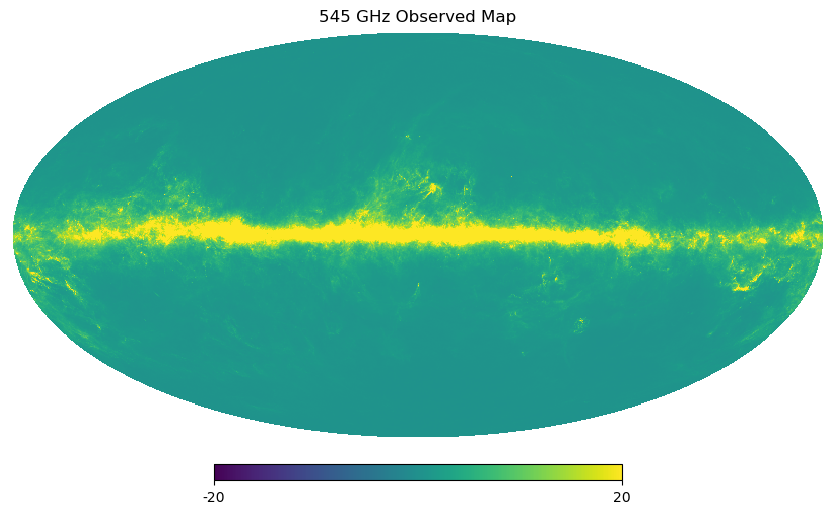

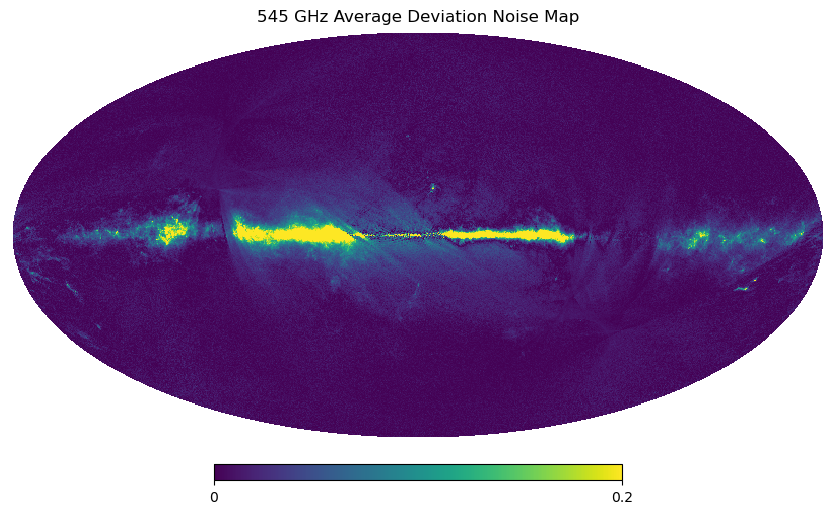

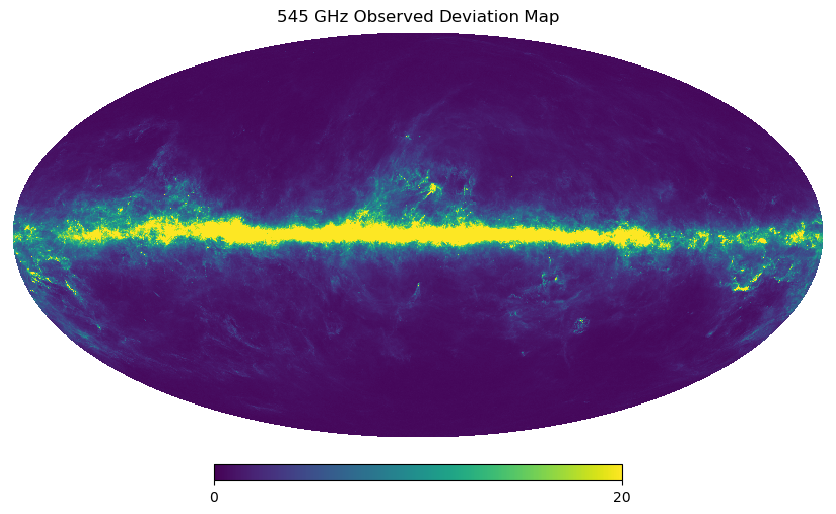

In [5]:
hp.mollview(planck_nse_avg, title=f"{DET} GHz Average Noise Map", min=-0.2, max=0.2)
hp.mollview(obs, title=f"{DET} GHz Observed Map", min=-20, max=20)

hp.mollview(np.abs(planck_nse_avg), title=f"{DET} GHz Average Deviation Noise Map", min=0, max=0.2)
hp.mollview(np.abs(obs), title=f"{DET} GHz Observed Deviation Map", min=0, max=20)

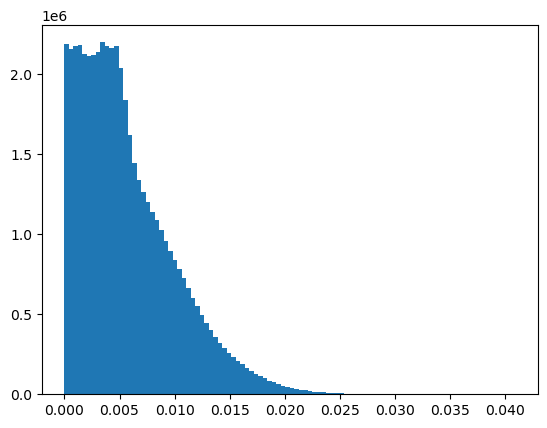

In [6]:
plt.hist(sig_map, bins=100);

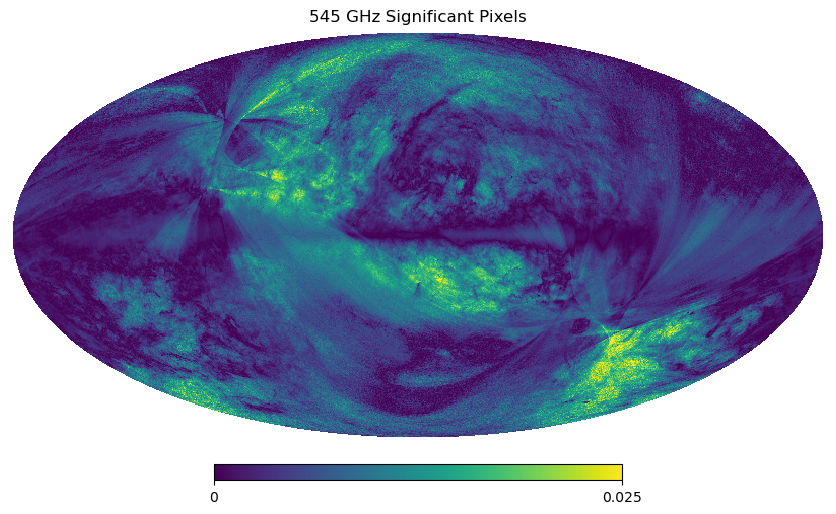

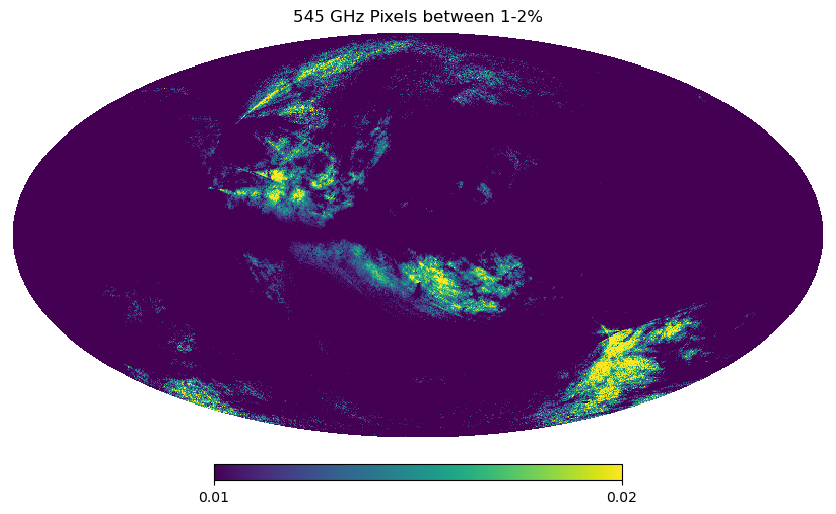

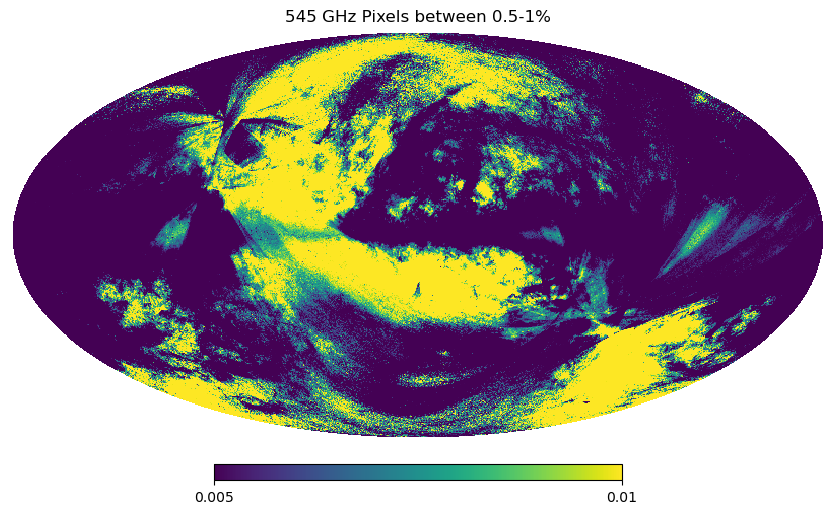

In [7]:
hp.mollview(sig_map, title=f"{DET} GHz Significant Pixels", min=0, max=0.025)
hp.mollview(sig_map, title=f"{DET} GHz Pixels between 1-2%", min=0.01, max=0.02)
hp.mollview(sig_map, title=f"{DET} GHz Pixels between 0.5-1%", min=0.005, max=0.01)

# Power Spectra

In [8]:
def plot_many_ps(ps_s,
            title=None, 
            x_low=0.7,
            x_high=1e4,
            y_low=1e-4,
            y_high=1e-2,
            styles=None,
            labels=None,
            white_noise_expected=None,
            legend=True,
            focus_first=False):
    y_label="$N_{\\ell}$" + f"(unit)"
    x_label="$\\ell$"
    plt.figure()
    for i, ps in enumerate(ps_s):
        ells = np.arange(len(ps)).astype(float)
        if x_low < 1:
            ells[0] = x_low
        style=None
        linewidth=None
        color=None
        if styles is None:
            pass
        elif styles[i] != "-":
            style = styles[i]
            linewidth = 2
        else:
            style = styles[i]
            linewidth = 1
        if focus_first and i == 0:
            color='black'
            linewidth=3
        label = None if labels is None else labels[i]
        plt.plot(ells, ps, label=label, linestyle=style, color=color, linewidth=linewidth)
    # if white_noise_expected is not None:
    #     plt.axhline(y=white_noise_expected, color='black', linestyle='--', linewidth=1)
    #     plt.text(y=white_noise_expected, x=x_high, s="$\\sigma_{\\ell}=" + f"{white_noise_expected:.1e}$", 
    #              color='black',
    #              horizontalalignment='right', verticalalignment='bottom')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim([x_low-0.00001, x_high])
    plt.ylim([y_low, y_high])
    plt.title(title)
    if legend:
        plt.legend()
    plt.show()

In [9]:
nse_avg_cl = hp.anafast(planck_nse_avg, lmax=2000)
nse_avg_sm_cl = hp.anafast(planck_nse_avg_sm, lmax=2000)
nse_sim_cl = hp.anafast(planck_nse_sim, lmax=2000)

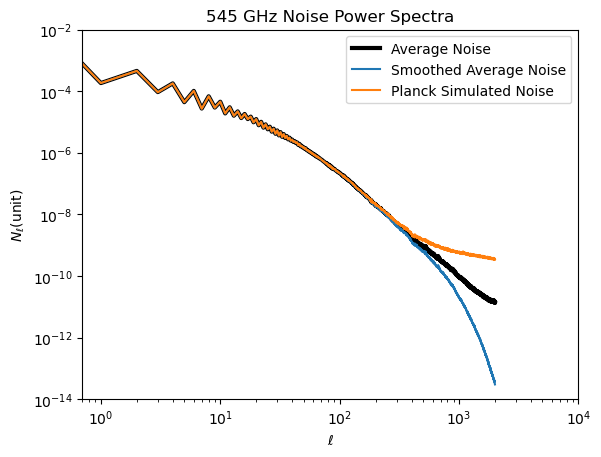

In [10]:
plot_many_ps([nse_avg_cl, nse_avg_sm_cl, nse_sim_cl],
              title=f"{DET} GHz Noise Power Spectra",
              y_low=1e-14,
              y_high=1e-2,
              labels=['Average Noise', 'Smoothed Average Noise', 'Planck Simulated Noise'],
              white_noise_expected=None,
              legend=True,
              focus_first=True)

# Deltas

In [11]:
planck_nse_sim2_fn = planck_nse_sim_fn = get_planck_noise_data(DET, PLANCK_NOISE_DIR, realization=1)
planck_nse_sim2 = hp.read_map(planck_nse_sim2_fn) * scale
nse_sim2_cl = hp.anafast(planck_nse_sim2, lmax=2000)

delta_sims = planck_nse_sim2 - planck_nse_sim
delta_sims_cl = hp.anafast(delta_sims, lmax=2000)

delta_sim_avg = planck_nse_sim - planck_nse_avg
delta_sim_avg_cl = hp.anafast(delta_sim_avg, lmax=2000)

delta_sim_avg2 = planck_nse_sim2 - planck_nse_avg
delta_sim_avg_cl2 = hp.anafast(delta_sim_avg2, lmax=2000)

delta_sim_avg_sm = planck_nse_sim2 - planck_nse_avg_sm
# delta_sim_avg_sm_cl = hp.anafast(delta_sim_avg_sm, lmax=2000)

planck_nse_sim_sm = hp.smoothing(planck_nse_sim, fwhm=np.radians(10/60))
delta_sim_avg_sm_sm = planck_nse_sim_sm - planck_nse_avg_sm
# delta_sim_avg_sm_sm_cl = hp.anafast(delta_sim_avg_sm_sm, lmax=2000)

# planck_nse_sim_sm2 = hp.smoothing(planck_nse_sim2, fwhm=np.radians(10/60))
# delta_sim_avg_sm_sm2 = planck_nse_sim_sm2 - planck_nse_avg_sm
# delta_sim_avg_sm_sm_cl2 = hp.anafast(delta_sim_avg_sm_sm2, lmax=2000)

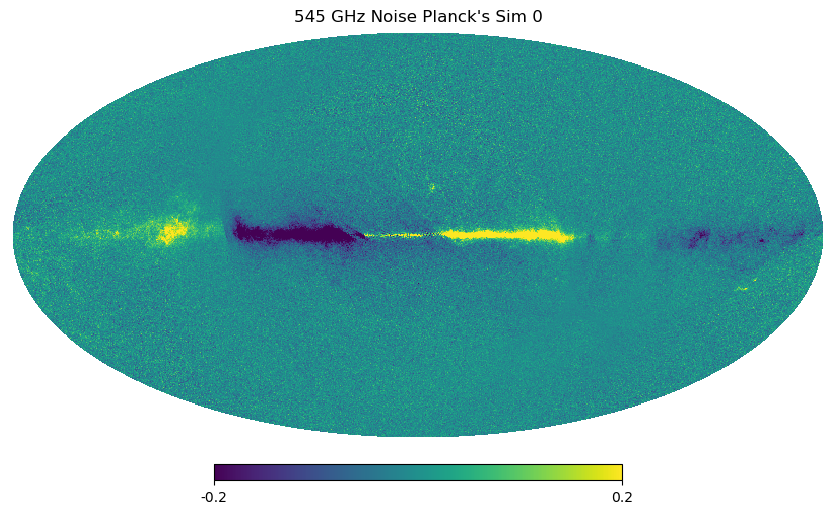

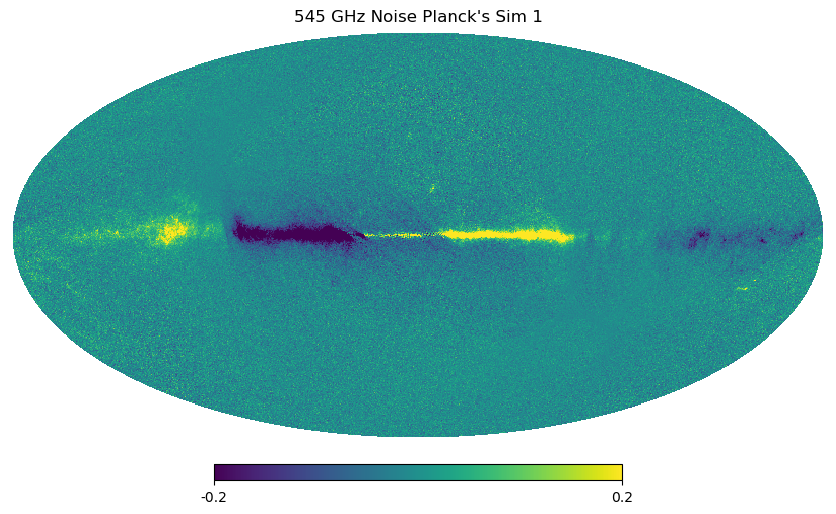

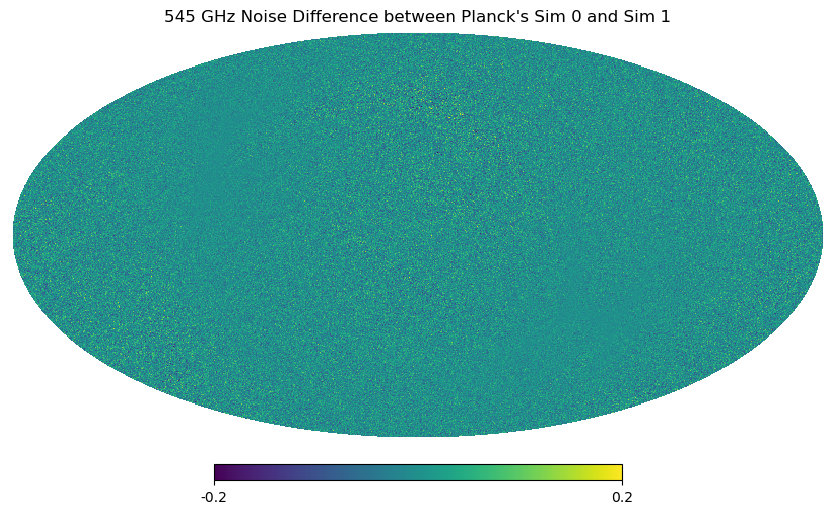

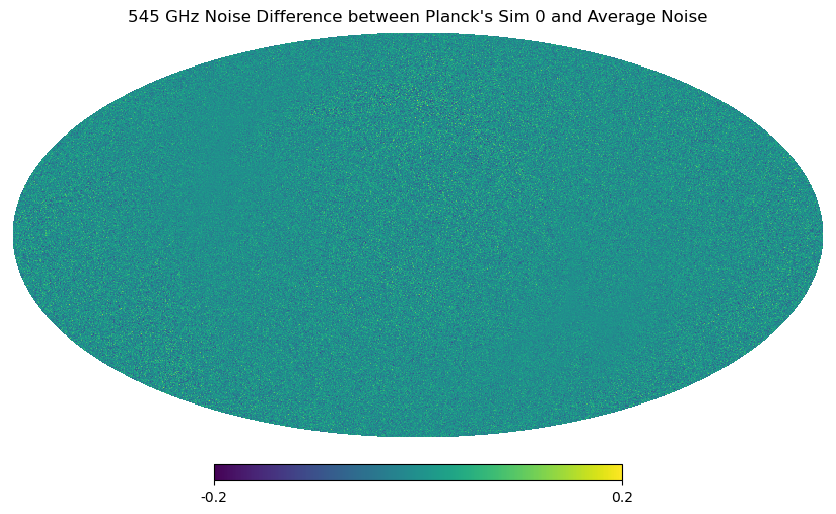

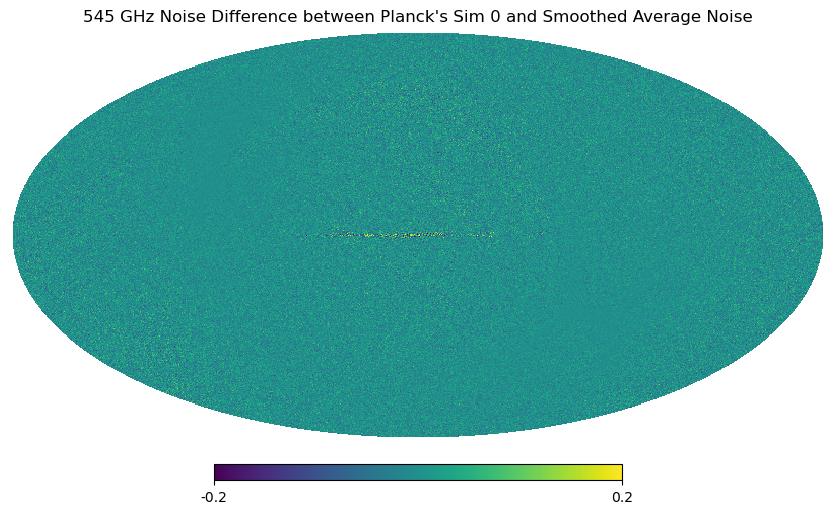

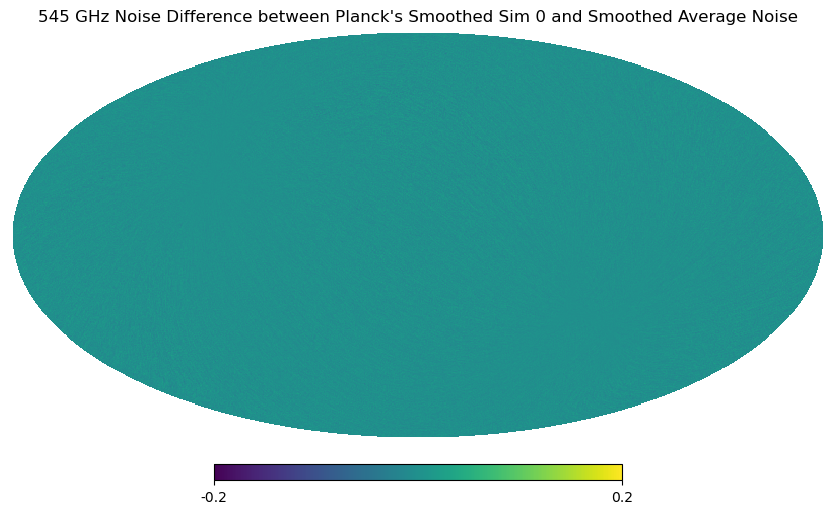

In [12]:
hp.mollview(planck_nse_sim, title=f"{DET} GHz Noise Planck's Sim 0", min=-0.2, max=0.2)
hp.mollview(planck_nse_sim2, title=f"{DET} GHz Noise Planck's Sim 1", min=-0.2, max=0.2)
hp.mollview(delta_sims, title=f"{DET} GHz Noise Difference between Planck's Sim 0 and Sim 1", min=-0.2, max=0.2)
hp.mollview(delta_sim_avg, title=f"{DET} GHz Noise Difference between Planck's Sim 0 and Average Noise", min=-0.2, max=0.2)
hp.mollview(delta_sim_avg_sm, title=f"{DET} GHz Noise Difference between Planck's Sim 0 and Smoothed Average Noise", min=-0.2, max=0.2)
hp.mollview(delta_sim_avg_sm_sm, title=f"{DET} GHz Noise Difference between Planck's Smoothed Sim 0 and Smoothed Average Noise", min=-0.2, max=0.2)

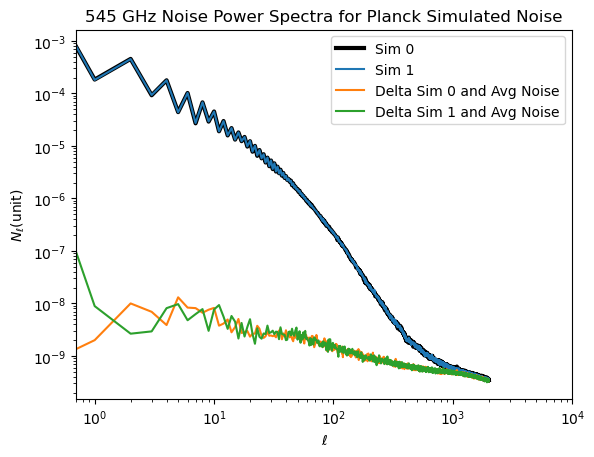

In [13]:
plot_many_ps([
              nse_sim_cl, 
              nse_sim2_cl, 
              # delta_sims_cl, 
              delta_sim_avg_cl, 
              delta_sim_avg_cl2
            #   delta_sim_avg_sm_cl, 
            #   delta_sim_avg_sm_sm_cl
              ],
              title=f"{DET} GHz Noise Power Spectra for Planck Simulated Noise",
              y_low=None,
              y_high=None,
              labels=[
                  "Sim 0",
                  "Sim 1",
                  # "Delta Sim 0 and Sim 1",
                  "Delta Sim 0 and Avg Noise",
                  "Delta Sim 1 and Avg Noise",
                #   "Delta Sim 0 and Sm Avg Noise",
                #   "Delta Sm Sim 0 and Sm Avg Noise"
                  ],
              white_noise_expected=None,
              legend=True,
              focus_first=True)

# Issue elsewhere with avg map... exploring here.

In [14]:
import pysm3.units as u

def convert_field_str_to_Unit(unit_str):
    custom_units = {
            # 'uK_CMB': u.uK_CMB,
            'Kcmb': u.K_CMB,
            # 'K_CMB': u.K_CMB,
            'MJy/sr': u.MJy / u.sr,
            'Kcmb^2': u.K_CMB**2,
            '(K_CMB)^2': u.K_CMB**2,
            # 'K_CMB^2': u.K_CMB**2,
            # 'uK_CMB^2': u.uK_CMB**2,
            # '(uK_CMB)^2': u.uK_CMB**2,
            # '(MJy/sr)^2': (u.MJy / u.sr)**2,
            '(Mjy/sr)^2': (u.MJy / u.sr)**2,
            # 'MJy/sr^2': (u.MJy / u.sr)**2
        }
    if not isinstance(unit_str, str):
        try:
            unit_str = unit_str.item()
        except AttributeError:
            raise TypeError(f"Expected a string, but got {type(unit_str)}")

    try:
        # Attempt to parse with Astropy's Unit function
        return u.Unit(unit_str)
    except ValueError:  # Astropy throws a ValueError for unrecognized units
        if unit_str in custom_units.keys():
            return custom_units[unit_str]
        else:
            raise ValueError(f"Unit {unit_str} not recognized.")

In [15]:
from cmbml.utils.fits_inspection import get_field_unit

def downgrade_map_via_alm(some_map, target_nside):
    try:
        map_unit = some_map.unit
    except AttributeError:
        map_unit = None
    source_nside = hp.get_nside(some_map)
    assert target_nside <= source_nside/2, "Target nside must be less than the source nside"
    lmax_source = 3 * source_nside - 1
    alm = hp.map2alm(some_map, lmax=lmax_source)

    lmax_target = int(3 * target_nside - 1)
    alm_filter = np.zeros(lmax_source+1)
    alm_filter[:lmax_target+1] = 1
    alm_filtered = hp.almxfl(alm, alm_filter)
    some_map_filtered = hp.alm2map(alm_filtered, nside=target_nside)
    if map_unit is not None:
        some_map_filtered = u.Quantity(some_map_filtered, unit=map_unit)
    return some_map_filtered

def get_map_with_unit(fn):
    map_ = hp.read_map(fn)
    map_units = get_field_unit(fn, hdu=1, field_idx=0)
    map_units = convert_field_str_to_Unit(map_units)
    return map_ * map_units

def get_avg_map(detector, nside_out):
    fn = f"noise_avgs/avg_noise_map_{detector}_TQU_100.fits"
    planck_nse_avg = get_map_with_unit(fn)
    if hp.get_nside(planck_nse_avg) != nside_out:
        planck_nse_avg = downgrade_map_via_alm(planck_nse_avg, nside_out)
    return planck_nse_avg

In [21]:
def get_lmax_for_nside(nside):
    """Helper function: Max ell for a given nside; to be considered a parameter"""
    return 3 * nside - 1

In [22]:
nse_2048 = get_avg_map(DET, 2048)
cl_2048 = hp.anafast(nse_2048, lmax=get_lmax_for_nside(2048))

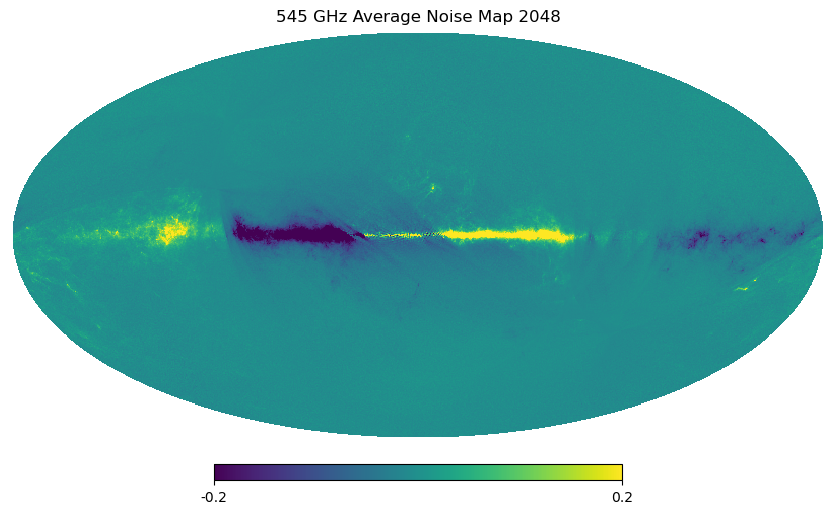

In [23]:
hp.mollview(nse_2048, title=f"{DET} GHz Average Noise Map 2048", min=-0.2, max=0.2)

In [24]:
nse_512 = get_avg_map(DET, 512)
cl_512 = hp.anafast(nse_512, lmax=get_lmax_for_nside(512))

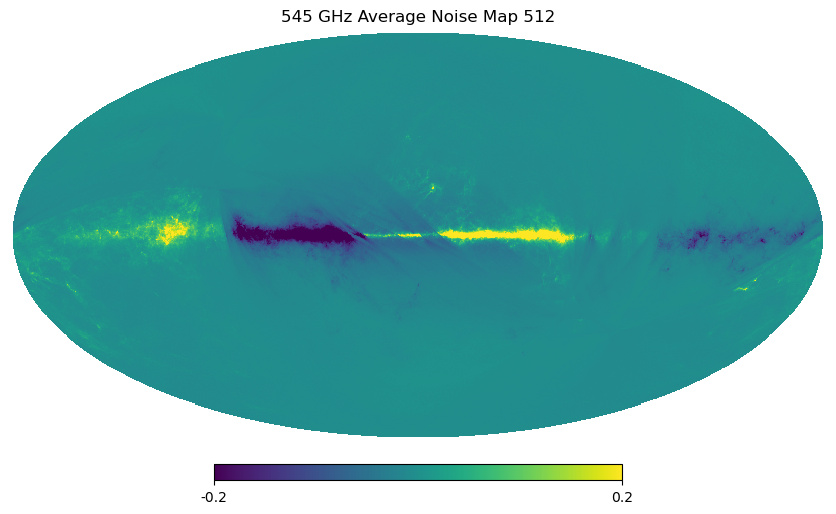

In [26]:
hp.mollview(nse_512, title=f"{DET} GHz Average Noise Map 512", min=-0.2, max=0.2)

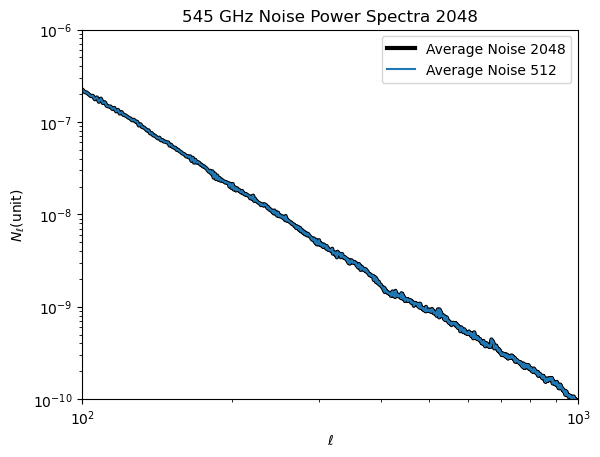

In [29]:
plot_many_ps([cl_2048, cl_512],
              title=f"{DET} GHz Noise Power Spectra 2048",
              y_low=1e-10,
              y_high=1e-6,
              x_low=100,
              x_high=1000,
              labels=['Average Noise 2048', 'Average Noise 512'],
              white_noise_expected=None,
              legend=True,
              focus_first=True)